# Импорты

In [16]:
from datetime import date, datetime

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from catboost import CatBoostClassifier
from catboost import CatBoostRegressor

from catboost import Pool

import matplotlib.pyplot as plt

import pickle

# Функции

In [2]:
def cat_num_split(df: pd.DataFrame) -> tuple:
    '''Ищем категориальные и числовые признаки в датафрейме'''

    cat_columns = []
    num_columns = []

    for column_name in df.columns:
        if (df[column_name].dtypes == object):
            cat_columns += [column_name]
        else:
            num_columns += [column_name]

    print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))
    print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

    return cat_columns, num_columns

In [3]:
def target_columns_dropper(df: pd.DataFrame) -> pd.DataFrame:
    '''Сбрасываем столбцы с целевыми переменными ответа банков'''
    df = df.copy()
    banks = ['BankA_decision',
             'BankB_decision',
             'BankC_decision',
             'BankD_decision',
             'BankE_decision']
    try:
        df.drop(banks, axis='columns', inplace=True)
    except:
        print('Dataframe have not target columns')

    return df

In [4]:
def CarierLevel_feature_creator_v2(df: pd.DataFrame) -> pd.Series:
    """
    Варианты преобразования:
    НИЗШЕЕ_ЗВЕНО     1809    рабочие специальности
    СРЕДНЕЕ_ЗВЕНО    1302    рядовые инженеры, врачи и специалисты с высшим образованием
    МЕН1              921    старшие менеджеры
    МЕН2              583    менеджеры
    ДИР1              242    генеральные директора и им подобные
    ДИР2              554    директора магазинов, направлений и им подобные
    САМ               521    самозанятые
    ИП                404    индивидуальные предприниматели
    ЗАМДИР            128    заместители директоров
    РЕЗЕРВ            109    те кто без работы
    ЗАМНАЧ             30
    """
    f = df['Position'].copy()
    f = f.str.lower()
    f = f.str.strip()
    f1 = f
    L_7 = [
    "генеральный директор",
    "генеральный дирекор",
    "генеральный",
    "гене",
    "генер",
    "генера",
    'генераль',
    "ген дир",
    "ген",
    "учредитель",
    'соучредитель',
    'собственник',
    'полномочный представитель президента',
    'председатель наблюдательского совета',
    'президент'
    ]
    for s in L_7:
       f1 = f1.mask(lambda  x : x == s, other = 'ДИР1')
    L_6 = [
    "директор",
    'директрор',
    "руководитель",
    "директор филиала/ департамента",
    'директор магазина',
    'дирек',
    'дирек',
    'дире',
    'дир',
    'председатель',
    'продюссер'
    ]
    for s in L_6:
       f1 = f1.mask(lambda  x : x == s, other = 'ДИР2')
    L_5 = [
    "заместитель директора",
    "заместитель генерального директора",
    'заместитель директора',
    "зам",
    "коммерческий директор",
    "заместитель / и.о. генерального директора",
    "и.о. заместитель ген. директора по развитию",
    "зам.руководителя",
    'зам.зав аптекой'
    ]
    for s in L_5:
       f1 = f1.mask(lambda  x : x == s, other = 'ЗАМДИР')
    L_4 = [
      "старший менеджер",
      "старший мене",
      "старший менедж",
      "ведущий менеджер",
      "главный менеджер",
      "главный специалист",
      'главный спе'
      "главный инженер",
      "менеджер",
      "мене",
      "менед",
      "руков",
      "руко",
      "рук",
      "главный бухгалтер",
      'главный бух',
      "начальник отдела",
      "начальник",
      "продюсер",
      "руководитель отдела",
      "менеджер по работе с ключевыми клиентами",
      "начальнык отдела",
      "начальник п",
      'менеджер по работе с маркетплейсами',
      'руководитель колл-центра',
      'начальник участка',
      'руководитель отдела продаж',
      'региональный менеджер',
      'директор по развитию',
      'заведующая отделением',
      'старший администратор',
      'главный технолог',
      'командир',
      'рукводитель',
      'шеф',
      'управляющий магазином',
      'старший мен',
     'старший тренер'
    ]
    for s in L_4:
       f1 = f1.mask(lambda  x : x == s, other = 'МЕН1')
    L_3 = [
     "администратор",
     "админи",
     "адм",
     "вдминистратор",
     'адми',
     "управляющий",
     "управляющая",
     'управ',
     "менеджер по продажам",
     "специалист по продажам",
     "менедж",
     'мэнеджер',
     'мннеджер',
     "мастер",
     "маст",
     "оператор склада",
     "менеджер по работе с маркетплейсами",
     'руководитель колл-центра', 'заведующий складом',
     'менеджер по закупкам','менеджер по закупке',
     'старший продавец',
     'менеджер торговой зоны',
     'старший сотрудник охраны',
     'командир отдедения',
     'командир отделения',
     'старший кладовщик',
     'старший продавец-консультант',
     'заведующий',
     'бригадир',
     'бриг',
     'админ',
     'организатор'
     'управляющий персоналом',
     'управляющий персоналом',
     'управляющий отделением',
     'заведующая производством',
     'главный библиотекарь',
     'старший инструктор',
     'кассир-контроллер',
     'старшая акушерка',
     'старший кассир',
     'администрато',
     'руководител',
     'главный мех',
     'управляющи',
     'старший ме',
     'шеф-повар',
     'управляющ',
     'управляю',
     'админист',
     'управля',
     'менедже',
     'директо',
     'админис',
     'управл',
     'руково',
     'завуч',
     'нача',
     'организатор перевозок',
     'заведующая складом',
     'старший капитан'
     ]
    for s in L_3:
       f1 = f1.mask(lambda  x : x == s, other = 'МЕН2')
    L_2 = [
   "старший специалист",
   "старший спец",
   "ведущий специалист",
   'ведущий спе',
   'логопед',
   'психолог',
   'воспит',
   'вос',
   'дизайнер',
   "товаровед",
   "маркетолог",
   'hr',
  'кадровый работник',
   "бухгалтер",
   'бухга',
   'бухг'
   "бух",
   'бух',
   "преподаватель",
   "препо",
   "учитель",
   "инженер",
   'инже',
   "инж",
   "оператор",
   "врач",
   "программист",
   "графический дизайнер",
   "репетитор",
   "технолог",
   "экономист",
   "юрист",
   "адвокат",
   "редседатель",
   "машинист",
   "хормейстер",
   "ведущий инженер",
   "старший слесарь",
   "системный администратор",
   "воспитатель",
   "эксперт",
   "доцент",
   "финансовый консультант",
   'фин',
   "аналитик",
   'средний медперсонал',
   'маркето',
   'режиссер',
   'режиссер',
   'музыкальный р',
   'кассир-контролер',
   'секретарь',
   'риэлтор',
   'риэ',
   'риелтор',
   'педагог',
   'пластический хирург',
   'логопед'
   "специалист",
   "спец",
   "специ",
   "specialist",
   'дизайнер',
   "копирайтер",
   "педагог до",
   'Учитель-логопед.',
   'учит',
   'учит',
   'учите',
   'учи',
   'юрисконсульт',
   'юридический консультант',
   'провизор',
   'коуч',
   'прог',
   'логист',
   'электроник /электронщик',
   'эксперт в сфере образования',
   'художник театрального костюма',
   'финансовый контроллер',
   'тренер групповых программ',
   'старший инжинер по разработке',
   'солист военного оркестра',
   'секретарь учебной части',
   'разработчик автоворонок',
   'педагог дополнительного образования',
   'мастер строительных работ',
   'мастер производственного обучения вождению',
   'агент по недвижимости',
   'финансовый советник',
   'младший воспитатель',
   'эксперт по рекламе',
   'управляющий делами',
   'социальный педагог',
   'машинист тепловоза',
   'днелопроизводитель',
   'старший товаровед',
   'профессор кафедры',
   'старший психолог',
   'культорганизатор',
   'химик-технолог',
   'мастер участка',
   'концертмейстер',
   'преподователь',
   'авиадиспетчер',
   'главный спец',
   'библиотекарь',
   'тестировщик',
   'старший тех',
   'старший спе',
   'старший инс',
   'следователь',
   'разработчик',
   'организатор',
   'нутрициолог',
   'главный спе',
   'таргетолог',
   'специолист',
   'метеоролог',
   'главный бу',
   'фрилансер',
   'сценарист',
   'специалст',
   'научный с',
   'маршейдер',
   'лешмейкер',
   'штурман',
   'фриланс',
   'препода',
   'подолог',
   'воспита',
   'специа',
   'релтор',
   'режисс',
   'препод',
   'логист',
   'инжене',
   'дизай',
   'воспи',
   'фарм',
   'медицинский психолог',
   'геолог',
   'кредитный эксперт'
    ]
    for s in L_2:
      f1 = f1.mask(lambda  x : x == s, other = 'СРЕДНЕЕ_ЗВЕНО')
    L_1 = [
     'лесной пожарный',
     'мастер бровист',
     'контролер кпп',
     'бьюти мастер',
     'мастер ман',
     'кровельщик',
     'Мед сестра',
     'астролог',
     'турагент',
     'аниматор',
     'волонтер',
     'массажист',
     'сушильщик',
     'рядовой',
     'самелье',
     'санитар',
     'медбрат',
     "уборщик",
     "сиделка",   
     "водитель",
     "продавец",
     "прода",
     "повар",
     "официант",
     "курьер",
     "консультант",
     "продавец-консультант",
     "продавец консультан",
     "продавец-кассир",
     "кладовщик",
     "косметолог",
     "сотрудник охраны",
     "слесарь",
     "сле",
     "кассир",
     "массажист",
     "электромонтер",
     "монтажник",
     "мастер маникюра",
     "электрик",
     "элек",
     "торговый представитель",
     "механик",
     "супервайзер",
     "инструктор",
     "персональный менеджер",
     "водитель-экспедитор",
     "водит",
     "продавец кассир",
     "рабочий",
     'сварщик',
     'свар',
     'агент',
     'диспетчер',
     'медицинская сестра',
     'медсестра',
     'токарь',
     "офи",
     'офици',
     'тренер',
     'владелец',
     'психолог-консультант',
     'помощник юриста',
     "швея",
     'шве',
     "парикмахер",
     "техник",
     'охранник',
     'охр',
     'няня',
     'косметолог-визажист',
     'сотрудник',
     'сотрудник склада',
     'кондитер',
     'фельдшер',
     'формовщик',
     'маляр',
     'проходчик',
     'техперсонал',
     'строитель',
     'клад',
     'наставник',
     'уборщица',
     'оптометрист',
     'пекарь',
     'официа',
     'контралер',
     'разнорабочая',
     'кладов',
     'комплектовщик',
     'термист',
     'бар',
     'бариста',
     'моряк',
     'стано',
     'сторож',
     'таксис',
     'грузчик',
     'пред'
     ]
    for s in L_1:
      f1 = f1.mask(lambda  x : x == s, other = 'НИЗШЕЕ_ЗВЕНО')
    f1 = f1.mask(lambda x : x == "индивидуальный предприниматель", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индивидуальный пре", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индивидуальный", other = 'ИП')
    f1 = f1.mask(lambda x : x == "инд", other = 'ИП')
    f1 = f1.mask(lambda x : x == "ип", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индив", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индиви", other = 'ИП')
    f1 = f1.mask(lambda x : x == "индивидуальны", other = 'ИП')
    f1 = f1.mask(lambda x : x == "инди", other = 'ИП')
    f1 = f1.mask(lambda x : x == "предприниматель", other = 'ИП')
    f1 = f1.mask(lambda x : x == "предпри", other = 'ИП')
    f1 = f1.mask(lambda x : x == "самозанятый", other = 'САМ')
    f1 = f1.mask(lambda x : x == "самозанятая", other = 'САМ')
    f1 = f1.mask(lambda x : x == "самоазанятый", other = 'САМ')
    f1=f1.fillna('НЕТ_ДАННЫХ')
    Filled = ['ДИР1','ДИР2', 'МЕН1', 'МЕН2','ИП','САМ',
              'ЗАМДИР','ЗАМНАЧ', 'НИЗШЕЕ_ЗВЕНО', 'СРЕДНЕЕ_ЗВЕНО', 'НЕТ_ДАННЫХ', "РЕЗЕРВ"]
    # Названия должностей которые входят в некоторую строку.
    f1[f1.str.contains('рабочий')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('слесарь')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('помощник')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('сборщик')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('руководитель')] = 'МЕН1'
    f1[f1.str.contains('начальник ')] = 'МЕН1'
    f1[f1.str.contains('самоз')] = 'САМ'
    f1[f1.str.contains('инспектор')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('инженер')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('врач')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('вра')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('фармацевт')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('старший специалист')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('представитель')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('преподаватель')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('ведущий')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('бухг')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('учитель')] = 'СРЕДНЕЕ_ЗВЕНО'
    f1[f1.str.contains('заместитель директора')] = 'ЗАМДИР'
    f1[f1.str.contains('заместитель')] = 'ЗАМНАЧ'
    f1[f1.str.contains('заме')] = 'ЗАМНАЧ'
    f1[f1.str.contains('оператор')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('лаборант')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('электрик')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('продавец')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('сварщик')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('менеджер')] = 'МЕН2'
    f1[f1.str.contains('главный специалист')] = 'МЕН2'
    f1[f1.str.contains('специалист')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('монтажник')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('водитель ')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('парикмахер')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('ногтевого')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('санитарка')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('продав')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('монтер')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('техник')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('продовец')] = 'НИЗШЕЕ_ЗВЕНО'
    f1[f1.str.contains('директор')] = 'ДИР2'
    f1[f1.str.contains('безработный')] = 'РЕЗЕРВ'
    #f1 = f1[~f1.isin(Filled)] # Временно убираем обработанные строки.
    f1[~f1.isin(Filled)] = 'НИЗШЕЕ_ЗВЕНО'
    #print(contain_values)
    CarierLevel = f1

    return CarierLevel


def features_creator_pipe(df: pd.DataFrame) -> pd.DataFrame:
   '''Пайплайн  создания признаков, необходимых для работы модели'''
   df = df.copy()

   return df

In [12]:
def create_cat_pool(
        df: pd.DataFrame, 
        feature_name: str
        ) -> tuple:
    '''Создаем тренировочный и валидационный набор для CatBoost'''
    df = df.copy()
    y = df[feature_name]
    df = target_columns_dropper(df)
    X = df
    features_names = list(X.columns)
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=42)
    cat_features, num_features = cat_num_split(X)
    train_data = Pool(
        data=X_train, 
        label=y_train,
        cat_features=cat_features,
        feature_names=features_names
    )
    eval_data = Pool(
        data=X_test,
        label=y_test,
        cat_features=cat_features,
        feature_names=features_names
    )

    return train_data, eval_data, features_names

In [6]:
def create_cls_model(
        train_data,
        eval_data,
        features_names
        ) -> CatBoostClassifier:
    '''Создаем модель классификатора CatBoost'''
    model = CatBoostClassifier(task_type="GPU", iterations=5000, early_stopping_rounds=100)
    model.fit(X=train_data, eval_set=eval_data)

    ftr_imp = model.feature_importances_/np.sum(model.feature_importances_)
    sorted = np.argsort(ftr_imp)
    ypos = np.arange(len(np.array(features_names)))
    fig = plt.figure(figsize=(8, 8))
    plt.barh(ypos, ftr_imp[sorted])
    plt.xlim([0, 1])
    plt.title('Распределение весов входных параметров')
    plt.ylabel('Параметры')
    plt.xlabel('Значимость')
    plt.yticks(ypos, np.array(features_names)[sorted]);
    plt.show()

    return model

In [7]:

def Age_feature_creator(
    df: pd.DataFrame,
    ) -> pd.Series:
    '''Создаем признак "возраст"'''
    df = df.copy()

    return date.today().year - df['BirthDate'].dt.year


def Num_value_feature_creator(
    df: pd.DataFrame,
    ) -> pd.Series:
    '''Создаем признак "стаж работы" из даты начала работы'''
    df = df.copy()

    return date.today().year - df['JobStartDate'].dt.year


def Monthly_credit_payment(
    df: pd.DataFrame,
    ) -> pd.Series:
    '''Создаем функцию расчета ежемесячного платёжа'''
    df = df.copy()

    return df['Loan_amount'] // df['Loan_term']


def Payment_to_income(
    df: pd.DataFrame,
    ) -> pd.Series:
    '''Создаем признак "показатель долговой нагрузки"'''
    df = df.copy()
    monthly_payment = Monthly_credit_payment(df) + df['MonthExpense']

    return monthly_payment / df['MonthProfit']

# Загружаем датасет

In [11]:
df = pd.read_csv(
    filepath_or_buffer='../data/cleared_df.csv',
    sep=';',
    index_col='SkillFactory_Id',
    parse_dates=['BirthDate', 'JobStartDate']
    )
df['Position'] = CarierLevel_feature_creator_v2(df)
df['Age'] = Age_feature_creator(df)
df.drop(['BirthDate'], axis='columns', inplace=True)
df['NumValue'] = Num_value_feature_creator(df)
df.drop(['JobStartDate', 'Value'], axis='columns', inplace=True)
df['Payment_to_income'] = Payment_to_income(df)
df.drop(['MonthProfit', 'MonthExpense', 'Loan_amount', 'Loan_term'],
        axis='columns', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6603 entries, 1.0 to 8787.0
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   education          6603 non-null   object 
 1   employment status  6603 non-null   object 
 2   Position           6603 non-null   object 
 3   Gender             6603 non-null   float64
 4   Family status      6603 non-null   object 
 5   ChildCount         6603 non-null   float64
 6   SNILS              6603 non-null   float64
 7   BankA_decision     6603 non-null   object 
 8   BankB_decision     6603 non-null   object 
 9   BankC_decision     6603 non-null   object 
 10  BankD_decision     6603 non-null   object 
 11  BankE_decision     6603 non-null   object 
 12  Merch_code         6603 non-null   float64
 13  Goods_category     6603 non-null   object 
 14  Age                6603 non-null   int32  
 15  NumValue           6603 non-null   int32  
 16  Payment_to_income  6603 n

# Создаем файлы моделей

categorical columns:	  ['education', 'employment status', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Age', 'NumValue', 'Payment_to_income'] 
 len =  7
Learning rate set to 0.061572
0:	learn: 1.0472433	test: 1.0495030	best: 1.0495030 (0)	total: 5.95ms	remaining: 29.7s
1:	learn: 1.0037150	test: 1.0080291	best: 1.0080291 (1)	total: 12.3ms	remaining: 30.6s
2:	learn: 0.9652380	test: 0.9712567	best: 0.9712567 (2)	total: 17.7ms	remaining: 29.5s
3:	learn: 0.9308194	test: 0.9384463	best: 0.9384463 (3)	total: 23.2ms	remaining: 29s
4:	learn: 0.9014169	test: 0.9109624	best: 0.9109624 (4)	total: 29.6ms	remaining: 29.6s
5:	learn: 0.8745233	test: 0.8852959	best: 0.8852959 (5)	total: 34.9ms	remaining: 29.1s
6:	learn: 0.8500986	test: 0.8620771	best: 0.8620771 (6)	total: 40.4ms	remaining: 28.8s
7:	learn: 0.8282164	test: 0.8418281	best: 0.8418281 (7)	total: 46ms	remaining: 28.7s
8:	learn: 0.8085310	test: 0.8230924	best: 

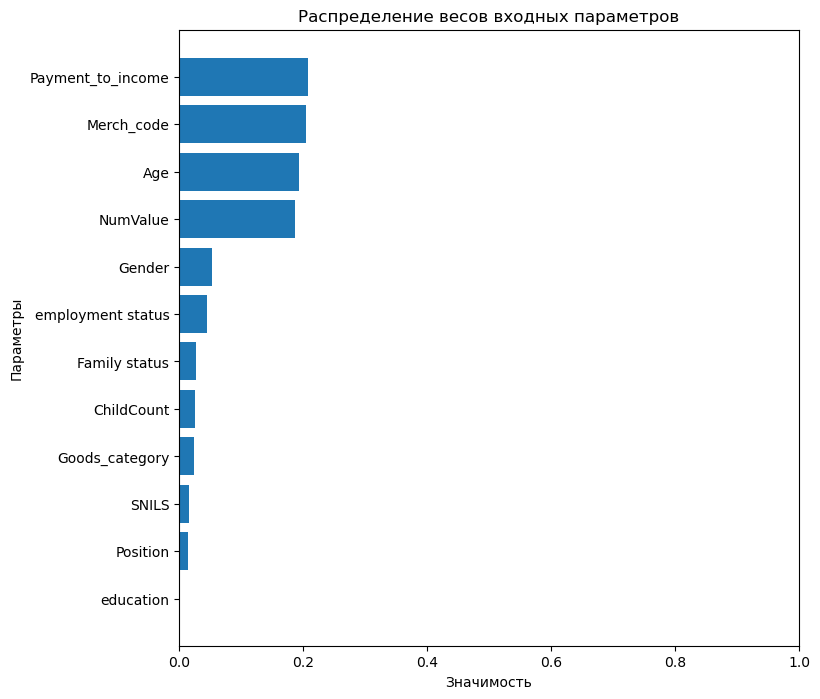

In [17]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'BankA_decision')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
#model.save_model('../models/BankA_decision.cls')
pickle.dump(model, open('../models/BankA_decision.cls', 'wb'))

categorical columns:	  ['education', 'employment status', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Age', 'NumValue', 'Payment_to_income'] 
 len =  7
Learning rate set to 0.061572
0:	learn: 1.0500850	test: 1.0518393	best: 1.0518393 (0)	total: 7.93ms	remaining: 39.6s
1:	learn: 1.0076379	test: 1.0106899	best: 1.0106899 (1)	total: 13.7ms	remaining: 34.1s
2:	learn: 0.9702373	test: 0.9746029	best: 0.9746029 (2)	total: 19ms	remaining: 31.7s
3:	learn: 0.9374044	test: 0.9429826	best: 0.9429826 (3)	total: 24.7ms	remaining: 30.8s
4:	learn: 0.9081256	test: 0.9148993	best: 0.9148993 (4)	total: 30.1ms	remaining: 30.1s
5:	learn: 0.8819142	test: 0.8895436	best: 0.8895436 (5)	total: 36.3ms	remaining: 30.2s
6:	learn: 0.8586664	test: 0.8674471	best: 0.8674471 (6)	total: 42.7ms	remaining: 30.5s
7:	learn: 0.8376744	test: 0.8474598	best: 0.8474598 (7)	total: 48.9ms	remaining: 30.5s
8:	learn: 0.8184847	test: 0.8295860	best

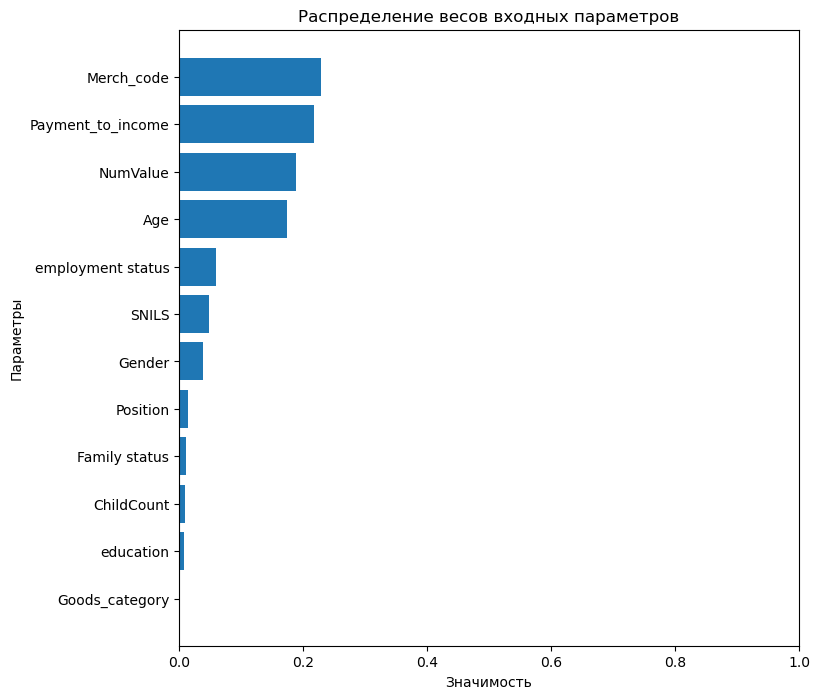

In [18]:
train_data, eval_data, features_names = create_cat_pool(df, 'BankB_decision')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
#model.save_model('../models/BankB_decision.cls')
pickle.dump(model, open('../models/BankB_decision.cls', 'wb'))

categorical columns:	  ['education', 'employment status', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Age', 'NumValue', 'Payment_to_income'] 
 len =  7
Learning rate set to 0.061572
0:	learn: 1.0485665	test: 1.0495848	best: 1.0495848 (0)	total: 7.11ms	remaining: 35.5s
1:	learn: 1.0061704	test: 1.0079110	best: 1.0079110 (1)	total: 13.9ms	remaining: 34.8s
2:	learn: 0.9687468	test: 0.9714046	best: 0.9714046 (2)	total: 19.9ms	remaining: 33.1s
3:	learn: 0.9355541	test: 0.9388545	best: 0.9388545 (3)	total: 25.4ms	remaining: 31.7s
4:	learn: 0.9057181	test: 0.9100771	best: 0.9100771 (4)	total: 31.2ms	remaining: 31.2s
5:	learn: 0.8796738	test: 0.8847561	best: 0.8847561 (5)	total: 37.1ms	remaining: 30.9s
6:	learn: 0.8557581	test: 0.8613423	best: 0.8613423 (6)	total: 42.4ms	remaining: 30.2s
7:	learn: 0.8343833	test: 0.8406447	best: 0.8406447 (7)	total: 48.4ms	remaining: 30.2s
8:	learn: 0.8153828	test: 0.8224011	be

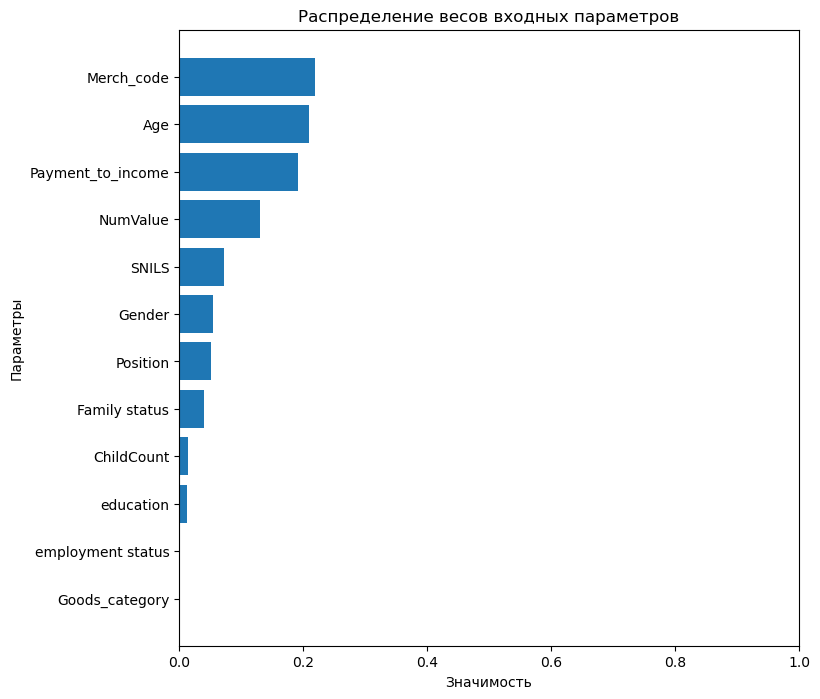

In [19]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'BankC_decision')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
#model.save_model('BankC_decision.cls')
pickle.dump(model, open('../models/BankC_decision.cls', 'wb'))

categorical columns:	  ['education', 'employment status', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Age', 'NumValue', 'Payment_to_income'] 
 len =  7
Learning rate set to 0.061572
0:	learn: 1.0488436	test: 1.0488435	best: 1.0488435 (0)	total: 6.48ms	remaining: 32.4s
1:	learn: 1.0062355	test: 1.0061640	best: 1.0061640 (1)	total: 12.7ms	remaining: 31.7s
2:	learn: 0.9690263	test: 0.9691160	best: 0.9691160 (2)	total: 18.3ms	remaining: 30.5s
3:	learn: 0.9355561	test: 0.9356703	best: 0.9356703 (3)	total: 23.7ms	remaining: 29.7s
4:	learn: 0.9055192	test: 0.9054005	best: 0.9054005 (4)	total: 30.4ms	remaining: 30.4s
5:	learn: 0.8791498	test: 0.8792661	best: 0.8792661 (5)	total: 36.8ms	remaining: 30.6s
6:	learn: 0.8557447	test: 0.8561135	best: 0.8561135 (6)	total: 43.3ms	remaining: 30.9s
7:	learn: 0.8344084	test: 0.8348196	best: 0.8348196 (7)	total: 49.3ms	remaining: 30.8s
8:	learn: 0.8151916	test: 0.8159451	be

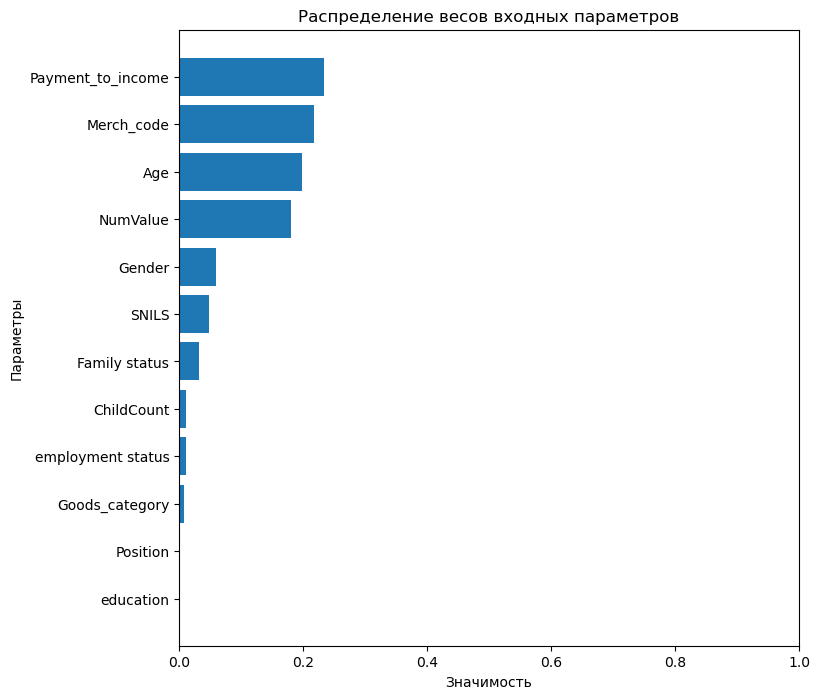

In [20]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'BankD_decision')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
#model.save_model('BankD_decision.cls')
pickle.dump(model, open('../models/BankD_decision.cls', 'wb'))

categorical columns:	  ['education', 'employment status', 'Position', 'Family status', 'Goods_category'] 
 len =  5
numerical columns:	  ['Gender', 'ChildCount', 'SNILS', 'Merch_code', 'Age', 'NumValue', 'Payment_to_income'] 
 len =  7
Learning rate set to 0.061572
0:	learn: 1.0505074	test: 1.0498709	best: 1.0498709 (0)	total: 6.58ms	remaining: 32.9s
1:	learn: 1.0074120	test: 1.0060850	best: 1.0060850 (1)	total: 12.2ms	remaining: 30.4s
2:	learn: 0.9699308	test: 0.9679569	best: 0.9679569 (2)	total: 17.7ms	remaining: 29.5s
3:	learn: 0.9365894	test: 0.9342996	best: 0.9342996 (3)	total: 23.4ms	remaining: 29.2s
4:	learn: 0.9066658	test: 0.9040143	best: 0.9040143 (4)	total: 29ms	remaining: 29s
5:	learn: 0.8801273	test: 0.8770019	best: 0.8770019 (5)	total: 34.5ms	remaining: 28.7s
6:	learn: 0.8562170	test: 0.8527970	best: 0.8527970 (6)	total: 39.4ms	remaining: 28.1s
7:	learn: 0.8352623	test: 0.8314200	best: 0.8314200 (7)	total: 45.2ms	remaining: 28.2s
8:	learn: 0.8158509	test: 0.8116929	best: 

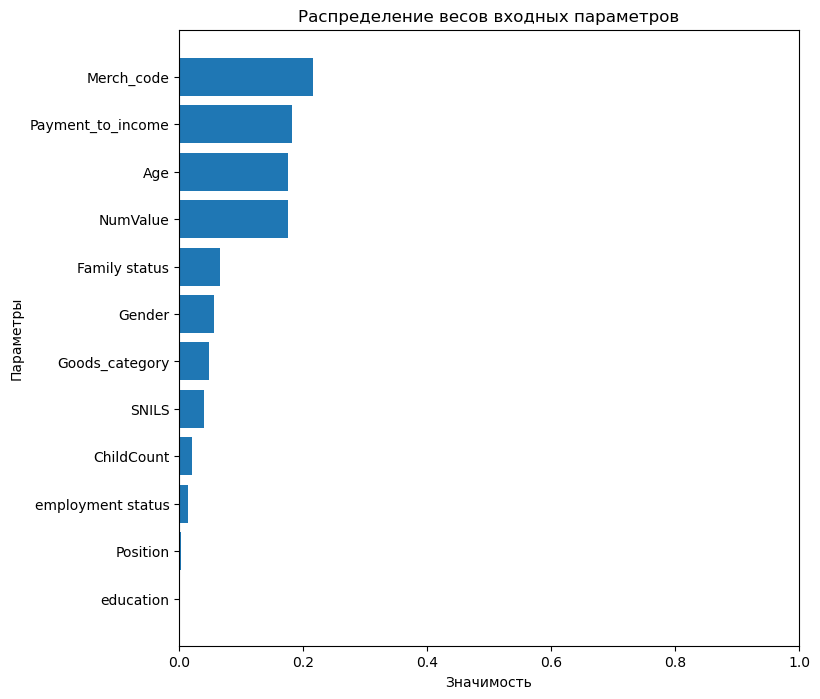

In [21]:
# Готовим Pool для обучения модели на алгоритме CatBoost:
train_data, eval_data, features_names = create_cat_pool(df, 'BankE_decision')
# Обучаем модель
model = create_cls_model(train_data, eval_data, features_names)
#model.save_model('BankE_decision.cls')
pickle.dump(model, open('../models/BankE_decision.cls', 'wb'))